In [1]:
import pandas as pd 
import numpy  as np 


In [2]:
df = pd.read_excel("Algoritma Apriori Chintya.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID transaksi    150 non-null    object 
 1   Mie Yamin Asin  150 non-null    float64
 2   Lumpia          150 non-null    float64
 3   Ocha            150 non-null    float64
 4   Black Sun       150 non-null    float64
 5   Ginger Tea      150 non-null    float64
dtypes: float64(5), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()
df.head()


,ID transaksi,Mie Yamin Asin,Lumpia,Ocha,Black Sun,Ginger Tea
0,NaN,NaN,NaN,NaN,NaN,NaN
1,T1,1.0,1.0,0.0,0.0,0.0
2,T2,1.0,0.0,1.0,1.0,0.0
3,T3,1.0,1.0,0.0,0.0,1.0
4,T4,1.0,1.0,0.0,1.0,0.0


In [5]:
df.dropna()


,ID transaksi,Mie Yamin Asin,Lumpia,Ocha,Black Sun,Ginger Tea
1,T1,1.0,1.0,0.0,0.0,0.0
2,T2,1.0,0.0,1.0,1.0,0.0
3,T3,1.0,1.0,0.0,0.0,1.0
4,T4,1.0,1.0,0.0,1.0,0.0
5,T5,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...
146,T146,0.0,1.0,1.0,1.0,0.0
147,T147,1.0,1.0,0.0,0.0,1.0
148,T148,0.0,1.0,1.0,1.0,0.0
149,T149,1.0,1.0,0.0,1.0,0.0


In [6]:
grouped_df = df.groupby('ID transaksi')[['Mie Yamin Asin', 'Lumpia', 'Ocha', 'Black Sun', 'Ginger Tea']].sum()

print(grouped_df)

              Mie Yamin Asin  Lumpia  Ocha  Black Sun  Ginger Tea
ID transaksi                                                     
T1                       1.0     1.0   0.0        0.0         0.0
T10                      1.0     1.0   1.0        0.0         0.0
T100                     1.0     1.0   0.0        0.0         1.0
T101                     1.0     0.0   1.0        1.0         0.0
T102                     0.0     1.0   0.0        0.0         1.0
...                      ...     ...   ...        ...         ...
T95                      1.0     1.0   1.0        1.0         0.0
T96                      1.0     0.0   1.0        0.0         1.0
T97                      1.0     1.0   0.0        0.0         0.0
T98                      0.0     1.0   1.0        1.0         0.0
T99                      1.0     0.0   1.0        0.0         1.0

[150 rows x 5 columns]


In [7]:

from mlxtend.frequent_patterns import apriori, association_rules
from tabulate import tabulate

# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menampilkan hasil frequent itemsets dalam bentuk tabel
print("Frequent Itemsets:")
print(tabulate(frequent_itemsets, headers='keys', tablefmt='pretty', showindex=False))

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

print("\nAssociation Rules:")
print(tabulate(rules, headers='keys', tablefmt='pretty', showindex=False))

Frequent Itemsets:
+---------------------+-------------------------------------------------------+
|       support       |                       itemsets                        |
+---------------------+-------------------------------------------------------+
|        0.74         |             frozenset({'Mie Yamin Asin'})             |
|        0.58         |                 frozenset({'Lumpia'})                 |
| 0.4666666666666667  |                  frozenset({'Ocha'})                  |
| 0.5466666666666666  |               frozenset({'Black Sun'})                |
| 0.5666666666666667  |               frozenset({'Ginger Tea'})               |
| 0.44666666666666666 |        frozenset({'Lumpia', 'Mie Yamin Asin'})        |
| 0.32666666666666666 |         frozenset({'Mie Yamin Asin', 'Ocha'})         |
| 0.36666666666666664 |      frozenset({'Mie Yamin Asin', 'Black Sun'})       |
| 0.3933333333333333  |      frozenset({'Ginger Tea', 'Mie Yamin Asin'})      |
| 0.21333333333333335

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [8]:


# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Memilih kolom yang diinginkan
selected_columns = rules[['antecedents', 'consequents', 'antecedent support', 'consequent support', 'support', 'confidence', 'lift']]

# Menampilkan hasil aturan asosiasi dengan styling
styled_rules = selected_columns.style.set_table_attributes('style="border-collapse: collapse; width: 100%;"') \
    .set_table_styles([{'selector': 'th', 'props': [('background-color', '#2196F3'), ('color', 'white'), ('border', '1px solid black')]},
                       {'selector': 'td', 'props': [('border', '1px solid black')]}]) \
    .set_properties(**{'padding': '10px', 'text-align': 'center'})

# Menampilkan hasil
styled_rules

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
0,frozenset({'Lumpia'}),frozenset({'Mie Yamin Asin'}),0.580000,0.740000,0.446667,0.770115,1.040696
1,frozenset({'Mie Yamin Asin'}),frozenset({'Lumpia'}),0.740000,0.580000,0.446667,0.603604,1.040696
2,frozenset({'Ocha'}),frozenset({'Mie Yamin Asin'}),0.466667,0.740000,0.326667,0.700000,0.945946
3,frozenset({'Black Sun'}),frozenset({'Mie Yamin Asin'}),0.546667,0.740000,0.366667,0.670732,0.906394
4,frozenset({'Ginger Tea'}),frozenset({'Mie Yamin Asin'}),0.566667,0.740000,0.393333,0.694118,0.937997
5,frozenset({'Mie Yamin Asin'}),frozenset({'Ginger Tea'}),0.740000,0.566667,0.393333,0.531532,0.937997
6,frozenset({'Lumpia'}),frozenset({'Black Sun'}),0.580000,0.546667,0.306667,0.528736,0.967199
7,frozenset({'Black Sun'}),frozenset({'Lumpia'}),0.546667,0.580000,0.306667,0.560976,0.967199
8,frozenset({'Ginger Tea'}),frozenset({'Lumpia'}),0.566667,0.580000,0.306667,0.541176,0.933063
9,frozenset({'Lumpia'}),frozenset({'Ginger Tea'}),0.580000,0.566667,0.306667,0.528736,0.933063


C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_4988\54157184.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='support', y=selected_columns.index, data=selected_columns, palette='Blues_d')


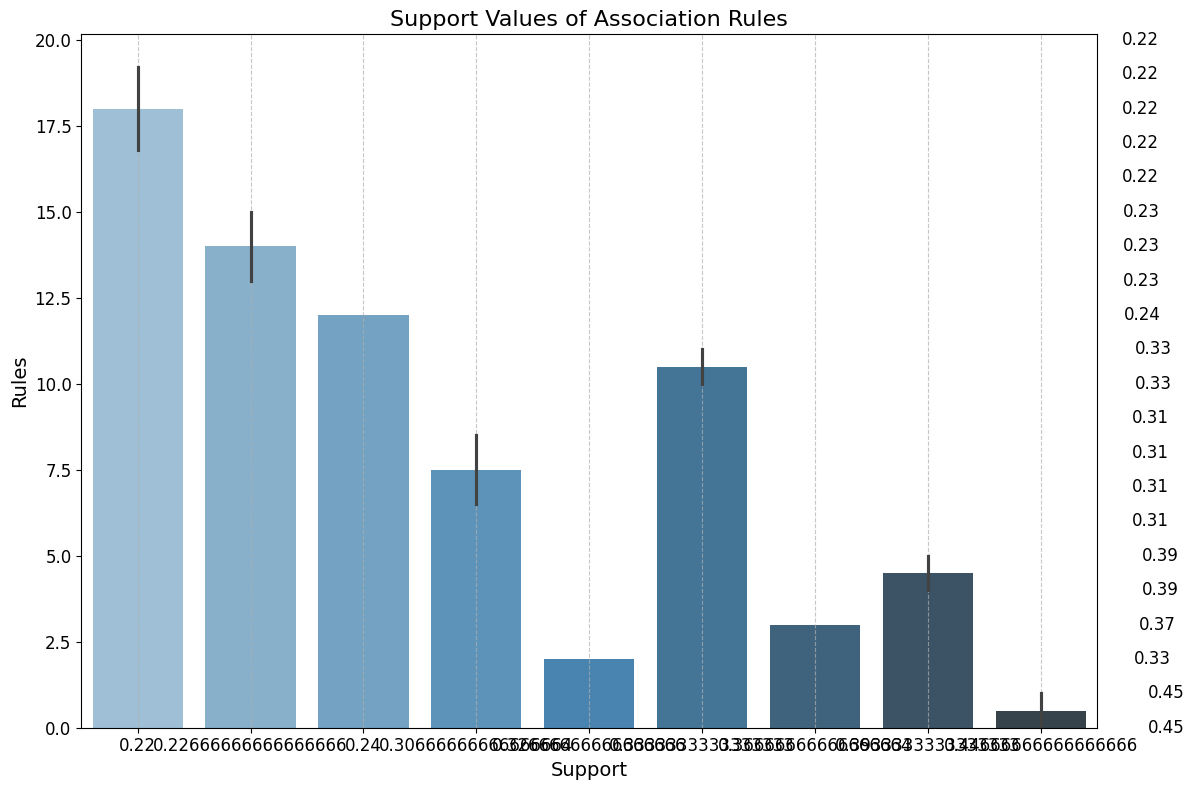

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori, association_rules

# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Memilih kolom yang diinginkan
selected_columns = rules[['antecedents', 'consequents', 'support']]

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Membuat grafik batang untuk nilai support
sns.barplot(x='support', y=selected_columns.index, data=selected_columns, palette='Blues_d')

# Menambahkan judul dan label
plt.title('Support Values of Association Rules', fontsize=16)
plt.xlabel('Support', fontsize=14)
plt.ylabel('Rules', fontsize=14)

# Menambahkan grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Menampilkan nilai support di atas batang
for index, value in enumerate(selected_columns['support']):

    plt.text(value + 8.5, index, f'{value:.2f}', va='center', fontsize=12, ha='left')

# Menyesuaikan tampilan
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()  # Mengatur layout agar lebih rapi

# Menampilkan grafik
plt.show()

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_4988\3083837988.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='rules_text', x='support', data=rules, palette='viridis')


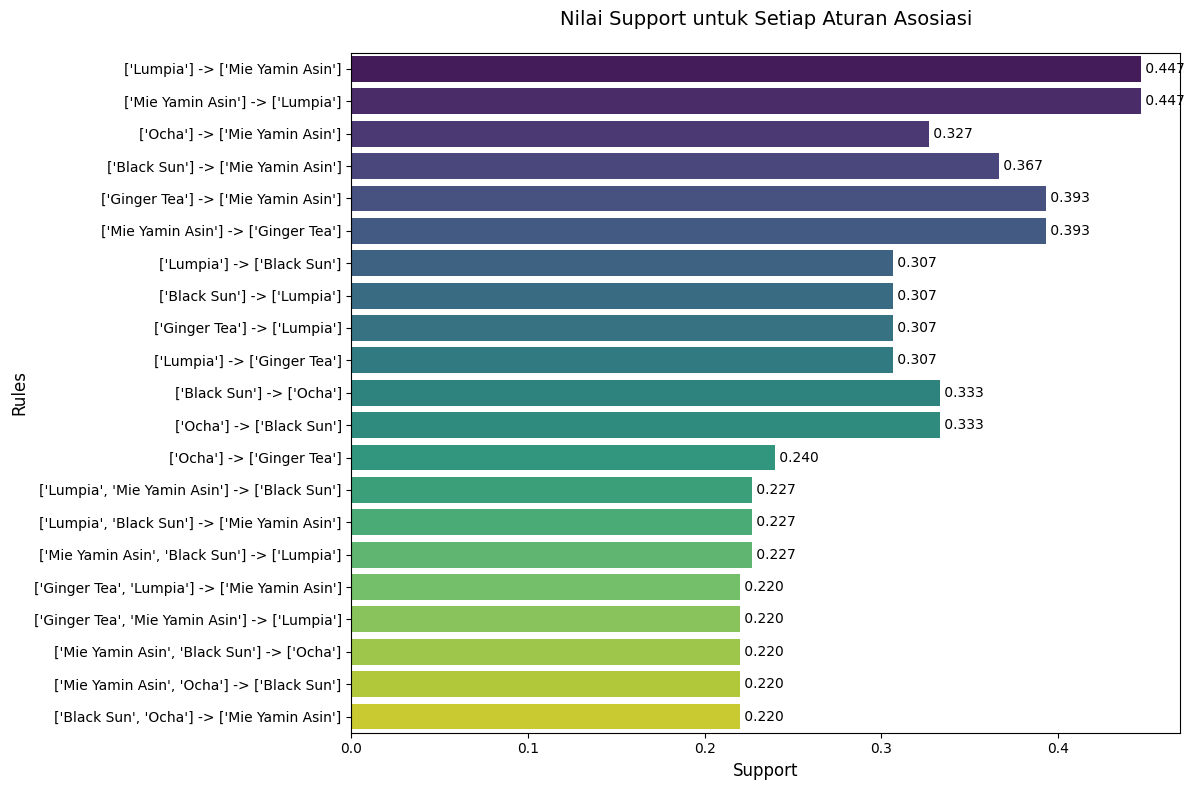

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Membuat kolom rules_text untuk label yang lebih mudah dibaca
rules['rules_text'] = rules.apply(lambda x: f"{list(x['antecedents'])} -> {list(x['consequents'])}", axis=1)

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Membuat grafik batang horizontal
sns.barplot(y='rules_text', x='support', data=rules, palette='viridis')

# Menambahkan judul dan label
plt.title('Nilai Support untuk Setiap Aturan Asosiasi', fontsize=14, pad=20)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Rules', fontsize=12)

# Menambahkan nilai support di ujung setiap batang
for i, v in enumerate(rules['support']):
    plt.text(v, i, f' {v:.3f}', va='center', fontsize=10)

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan grafik
plt.show()

C:\Users\tegar\AppData\Roaming\Python\Python312\site-packages\mlxtend\frequent_patterns\fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
C:\Users\tegar\AppData\Local\Temp\ipykernel_4988\1349138816.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='rules_text', x='support', data=rules, palette='viridis')


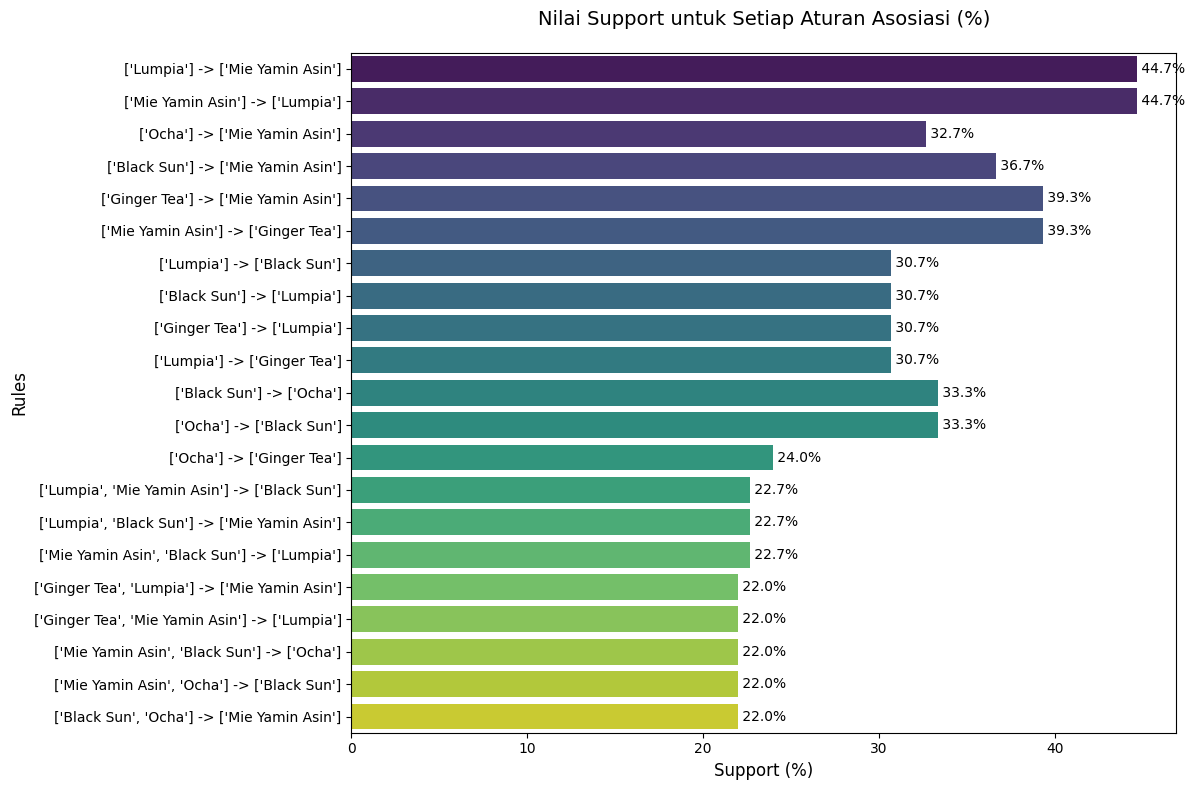

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung itemsets yang sering muncul
frequent_itemsets = apriori(grouped_df, min_support=0.2, use_colnames=True)

# Menghitung aturan asosiasi
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5)

# Mengubah nilai support menjadi persentase
rules['support'] = rules['support'] * 100

# Membuat kolom rules_text untuk label yang lebih mudah dibaca
rules['rules_text'] = rules.apply(lambda x: f"{list(x['antecedents'])} -> {list(x['consequents'])}", axis=1)

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Membuat grafik batang horizontal
sns.barplot(y='rules_text', x='support', data=rules, palette='viridis')

# Menambahkan judul dan label
plt.title('Nilai Support untuk Setiap Aturan Asosiasi (%)', fontsize=14, pad=20)
plt.xlabel('Support (%)', fontsize=12)
plt.ylabel('Rules', fontsize=12)

# Menambahkan nilai support di ujung setiap batang
for i, v in enumerate(rules['support']):
    plt.text(v, i, f' {v:.1f}%', va='center', fontsize=10)

# Menyesuaikan layout
plt.tight_layout()

# Menampilkan grafik
plt.show()